In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
import warnings ## importing warnings library 
warnings.filterwarnings('ignore') ## Ignore warning

In [2]:
# Loading campaign and event data
data_campaigns = pd.read_csv('campaigns_data.csv')
data_events = pd.read_csv('events_data.csv')

In [3]:
data_campaigns.head()

,campaign_id,campaign_name
0,1,demand great
1,2,blackout
2,3,flame broiled
3,4,take it from a fish
4,5,thank you


In [4]:
data_events.head()

,user_id,event_name,advertiser,campaign,gender,income,page_url,region,country
0,1024542728,Downstream Conversion,Costco,5,Male,unknown,/2016/03/18-best-paper-plant-tutorials.html/10/,Washington,US
1,1024542728,Impression,Costco,5,Male,unknown,/2016/03/18-best-paper-plant-tutorials.html/10/,Washington,US
2,1024542728,Impression,Costco,6,Male,unknown,/,Washington,US
3,1024542728,Impression,Costco,9,Male,unknown,/2010/11/let-me-make-you-some-giant-paper-flow...,Washington,US
4,1024542728,Impression,Costco,9,Male,unknown,/2016/05/diy-frida-kahlo-head-vase.html/#more-...,Washington,US


In [5]:
# Checking the structure and data types in the events dataset
data_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65038648 entries, 0 to 65038647
Data columns (total 9 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     int64 
 1   event_name  object
 2   advertiser  object
 3   campaign    int64 
 4   gender      object
 5   income      object
 6   page_url    object
 7   region      object
 8   country     object
dtypes: int64(2), object(7)
memory usage: 4.4+ GB


In [6]:
# Finding columns with missing values
cols_with_missing = [col for col in data_events.columns
                     if data_events[col].isnull().any()]
cols_with_missing

['page_url']

In [7]:

# Dropping the 'page_url' column 
data_events = data_events.drop('page_url', axis=1)

In [8]:
# Grouping data by 'event_name' and counting the number of events
df1 = data_events.groupby(['event_name'])['user_id'].count().reset_index()
df1 = df1.rename(columns={"user_id": "event_count"}) 
df1

,event_name,event_count
0,Click,5973571
1,Downstream Conversion,2214797
2,Impression,56850280


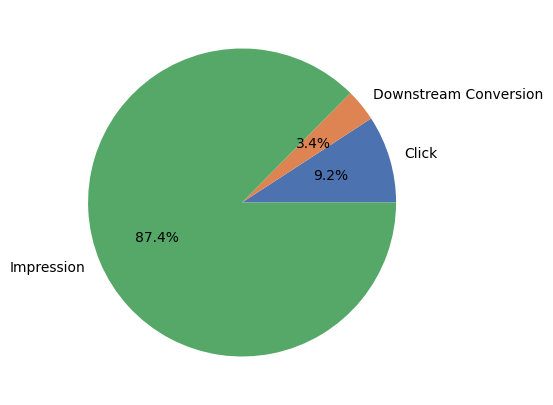

In [37]:
# Plotting a pie chart to show the proportion of each type of events
plt.figure(figsize=(5, 5))
sns.set_palette("deep") 
plt.pie(df1['event_count'], labels=df1['event_name'], autopct='%1.1f%%')
plt.title('')
plt.show()

#### Impression events dominate, accounting for 87.4% of the total events, followed by Click events (9.2%) and Downstream Conversion events (3.4%).

In [18]:
# Grouping by 'gender' and 'event_name', then counting events
df2 = data_events.groupby(['gender','event_name'])['user_id'].count().reset_index()
df2 = df2.rename(columns={"user_id": "event_count"}) 
df2

,gender,event_name,event_count
0,Female,Click,1467168
1,Female,Downstream Conversion,417708
2,Female,Impression,17866607
3,Male,Click,3408089
4,Male,Downstream Conversion,1485528
5,Male,Impression,25579375
6,unknown,Click,1098314
7,unknown,Downstream Conversion,311561
8,unknown,Impression,13404298


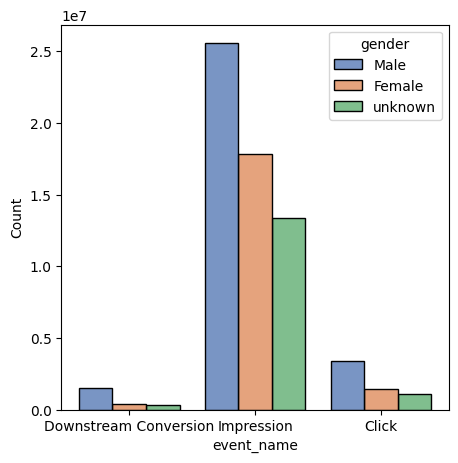

In [38]:
# Plotting a histogram to visualize event counts by gender
plt.figure(figsize=(5, 5))
sns.set_palette("deep")
sns.histplot(data=data_events, x="event_name", hue="gender", multiple="dodge", shrink=.8)
plt.title('')
plt.show()

#### Male users have the highest event counts across all categories, especially in Impressions.

In [39]:
# Grouping by 'advertiser' and counting events for each advertiser
df3 = data_events.groupby(['advertiser'])['user_id'].count().reset_index()
df3 = df3.rename(columns={"user_id": "event_count"}) 
df3 = df3.sort_values(by='event_count', ascending=False)
# Filtering to include only advertisers with more than 1.5 million events
df3 = df3[df3['event_count'] > 1500000]
df3

,advertiser,event_count
78,Subway,6131983
96,YUM! Brands,3830262
53,McDonalds,3169750
76,Starbucks,2861786
32,Dollar General,2600187
35,Dunkin Brands Group,2334286
90,Walgreen,1824681
0,7-Eleven,1794670
36,Family Dollar Stores,1777594
23,CVS Caremark,1720825


<Figure size 500x500 with 0 Axes>

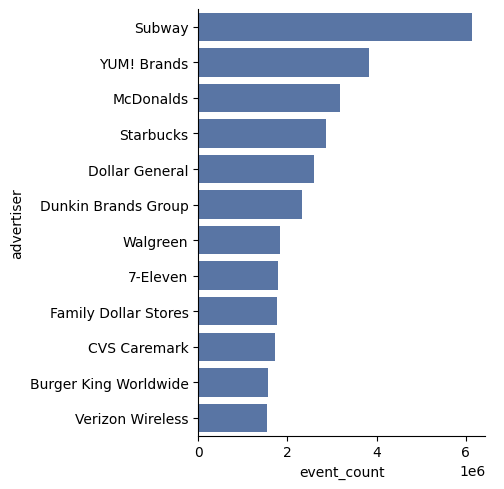

In [80]:
# Plotting a bar chart to show event counts by advertiser
plt.figure(figsize=(5, 5))
sns.set_palette("deep")
sns.catplot(data=df3, x="event_count", y="advertiser", kind="bar")
plt.title('')
plt.show()

#### Subway leads the advertisers with the most user interactions, followed by YUM! Brands, McDonald's, and others.

In [49]:
# Grouping by 'income' and 'gender', then counting events
df4 = data_events.groupby(['income','gender'])['user_id'].count().reset_index()
df4 = df4.rename(columns={"user_id": "event_count"}) 
df4

,income,gender,event_count
0,100k+,Female,1397611
1,100k+,Male,2159134
2,100k+,unknown,1051746
3,25k - 50k,Female,2863406
4,25k - 50k,Male,4410324
5,25k - 50k,unknown,2135667
6,25k and below,Female,1443204
7,25k and below,Male,2215107
8,25k and below,unknown,1080087
9,50k - 75k,Female,4254648


In [42]:
# Creating a function to assign numeric values to income categories
def f(row):
    if row['income'] == '25k and below':
        val = 25000
    elif row['income'] == '25k - 50k':
        val = 50000
    elif row['income'] == '50k - 75k':
        val = 75000
    elif row['income'] == '75k - 99k':
        val = 100000
    elif row['income'] == '100k+':
        val = 125000
    else:
        val = 0
    return val

In [84]:
# Applying the function to create a new 'avg_income' column
df4['avg_income'] = df4.apply(f, axis=1)
# Filtering out unknown or zero income values and unknown gender entries
df4 = df4[df4['avg_income'] != 0]
df4 = df4[df4['gender'] != 'unknown']
df4

,income,gender,event_count,avg_income
0,100k+,Female,1397611,125000
1,100k+,Male,2159134,125000
3,25k - 50k,Female,2863406,50000
4,25k - 50k,Male,4410324,50000
6,25k and below,Female,1443204,25000
7,25k and below,Male,2215107,25000
9,50k - 75k,Female,4254648,75000
10,50k - 75k,Male,6565068,75000
12,75k - 99k,Female,2794719,100000
13,75k - 99k,Male,4318650,100000


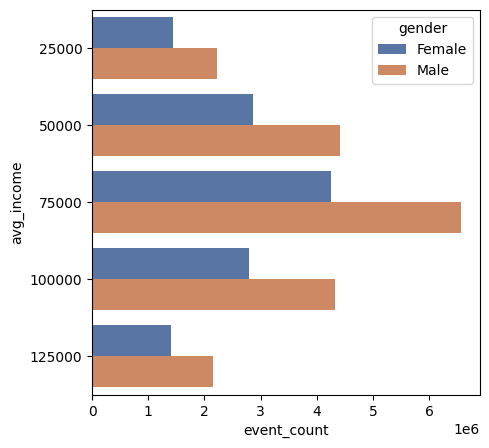

In [73]:
# Plotting a bar chart to show event counts by income and gender
plt.figure(figsize=(5, 5))
sns.set_palette("deep")
sns.barplot(df4, x="event_count", y="avg_income", hue="gender", orient="y")
plt.title('')
plt.show()

#### Across all income groups, males show higher engagement than females, especially in the $75k - $100k and $100k+ income groups.

In [45]:
# Merging event data with campaign data on 'campaign' and 'campaign_id'
data_events=data_events.merge(data_campaigns, left_on='campaign', right_on='campaign_id')

In [47]:
# Grouping by 'campaign_name' and counting events for each campaign
df5 = data_events.groupby(['campaign_name'])['user_id'].count().reset_index()
df5 = df5.rename(columns={"user_id": "event_count"}) 
df5 = df5.sort_values(by='event_count', ascending=False)
df5

,campaign_name,event_count
3,dream burger,15661484
4,flame broiled,12116205
8,thank you,8307672
12,warmth,7233894
6,run healthy,5224447
1,demand great,3561883
2,designed by you,3444706
7,take it from a fish,2846324
5,online lifestyle,2369337
0,blackout,2016271


<Figure size 500x500 with 0 Axes>

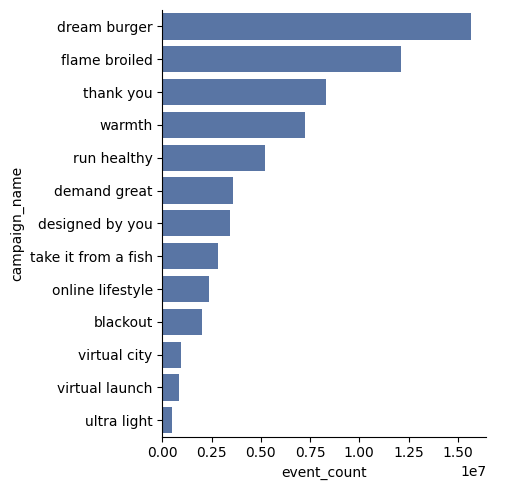

In [88]:
# Plotting a bar chart to show event counts by campaign
plt.figure(figsize=(5, 5))
sns.set_palette("deep")
sns.catplot(data=df5, x="event_count", y="campaign_name", kind="bar")
plt.title('')
plt.show()

In [71]:
# Grouping by 'campaign_name' and 'income', then counting events
df6 = data_events.groupby(['campaign_name','income'])['user_id'].count().reset_index()
df6 = df6.rename(columns={"user_id": "event_count"}) 
# Filtering out unknown income values
df6 = df6[df6['income'] != 'unknown']
df6

,campaign_name,income,event_count
0,blackout,100k+,142414
1,blackout,25k - 50k,291899
2,blackout,25k and below,146511
3,blackout,50k - 75k,433668
4,blackout,75k - 99k,286488
...,...,...,...
72,warmth,100k+,511425
73,warmth,25k - 50k,1048360
74,warmth,25k and below,525639
75,warmth,50k - 75k,1559535


In [69]:
# Applying the income function to get average income values
df6['avg_income'] = df6.apply(f, axis=1)
# Filtering out zero income values
df6 = df6[df6['avg_income'] != 0]
df6

,campaign_name,income,event_count,avg_income
0,blackout,100k+,142414,125000
1,blackout,25k - 50k,291899,50000
2,blackout,25k and below,146511,25000
3,blackout,50k - 75k,433668,75000
4,blackout,75k - 99k,286488,100000
...,...,...,...,...
72,warmth,100k+,511425,125000
73,warmth,25k - 50k,1048360,50000
74,warmth,25k and below,525639,25000
75,warmth,50k - 75k,1559535,75000


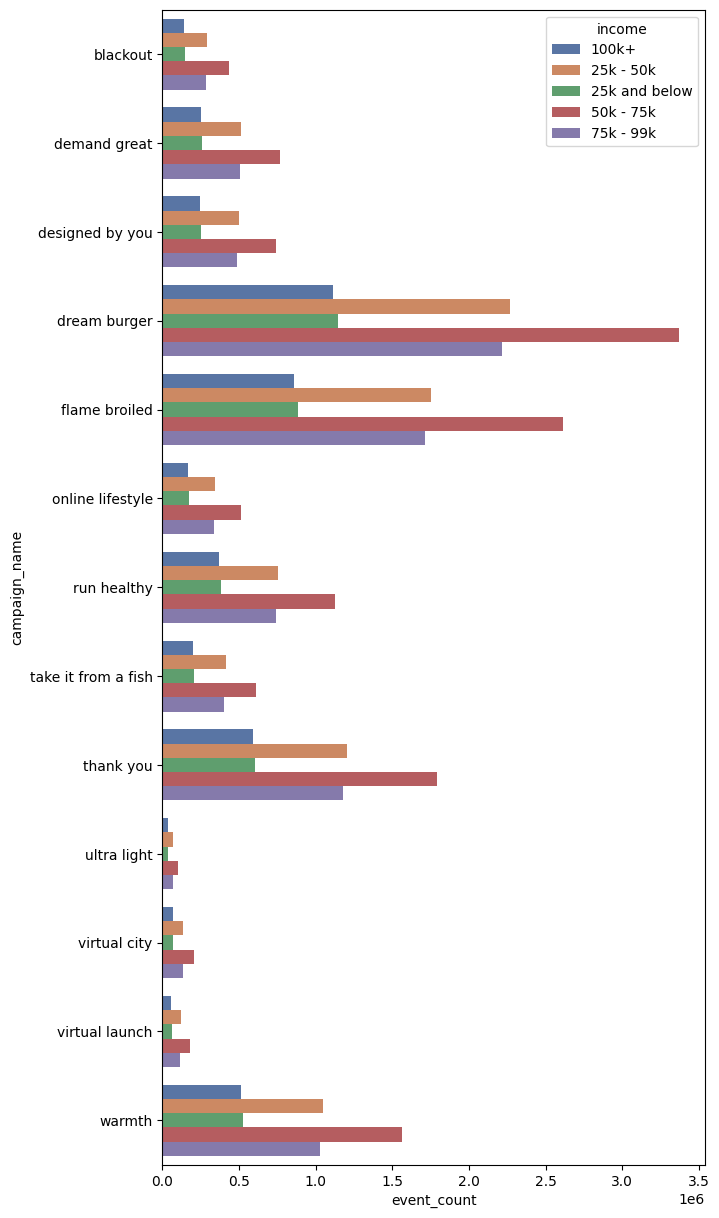

In [82]:
# Plotting a bar chart to show event counts by campaign and income
plt.figure(figsize=(7, 15))
sns.set_palette("deep")
sns.barplot(df6, x="event_count", y="campaign_name", hue="income")
plt.title('')
plt.show()

#### Campaigns like Dream Burger and Flame Broiled are particularly popular among higher-income groups, especially those in the $50k - $75k range.

#### There are clear differences in campaign performance based on income level, suggesting that certain campaigns resonate more with specific income groups.